In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv("monthly.csv")
dataset['Date_numeric'] = pd.to_datetime(dataset['Date']).dt.year * 12 + pd.to_datetime(dataset['Date']).dt.month

dataset = dataset.drop(columns=['Date'])
dataset

,Price,Date_numeric
0,34.730,23401
1,34.730,23402
2,34.730,23403
3,34.730,23404
4,34.730,23405
...,...,...
820,1303.618,24221
821,1282.126,24222
822,1238.064,24223
823,1201.859,24224


In [6]:
dataset.head()

,Price,Date_numeric
0,34.73,23401
1,34.73,23402
2,34.73,23403
3,34.73,23404
4,34.73,23405


In [7]:
dataset.tail(10)

,Price,Date_numeric
815,1265.674,24216
816,1332.809,24217
817,1333.775,24218
818,1325.562,24219
819,1335.332,24220
820,1303.618,24221
821,1282.126,24222
822,1238.064,24223
823,1201.859,24224
824,1199.198,24225


In [8]:
dataset.isnull().sum()

Price           0
Date_numeric    0
dtype: int64

In [9]:
dataset.describe()

,Price,Date_numeric
count,825.000000,825.00000
mean,388.730868,23813.00000
std,424.991665,238.30128
min,34.490000,23401.00000
25%,35.190000,23607.00000
50%,310.045000,23813.00000
75%,429.140000,24019.00000
max,1780.648000,24225.00000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         825 non-null    float64
 1   Date_numeric  825 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 9.8 KB


In [11]:
max = dataset[dataset['Price'] == dataset['Price'].max()]

print(max)

        Price  Date_numeric
740  1780.648         24141


In [12]:
min = dataset[dataset['Price'] == dataset['Price'].min()]

print(min)

    Price  Date_numeric
24  34.49         23425
25  34.49         23426


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date_numeric'}>]], dtype=object)

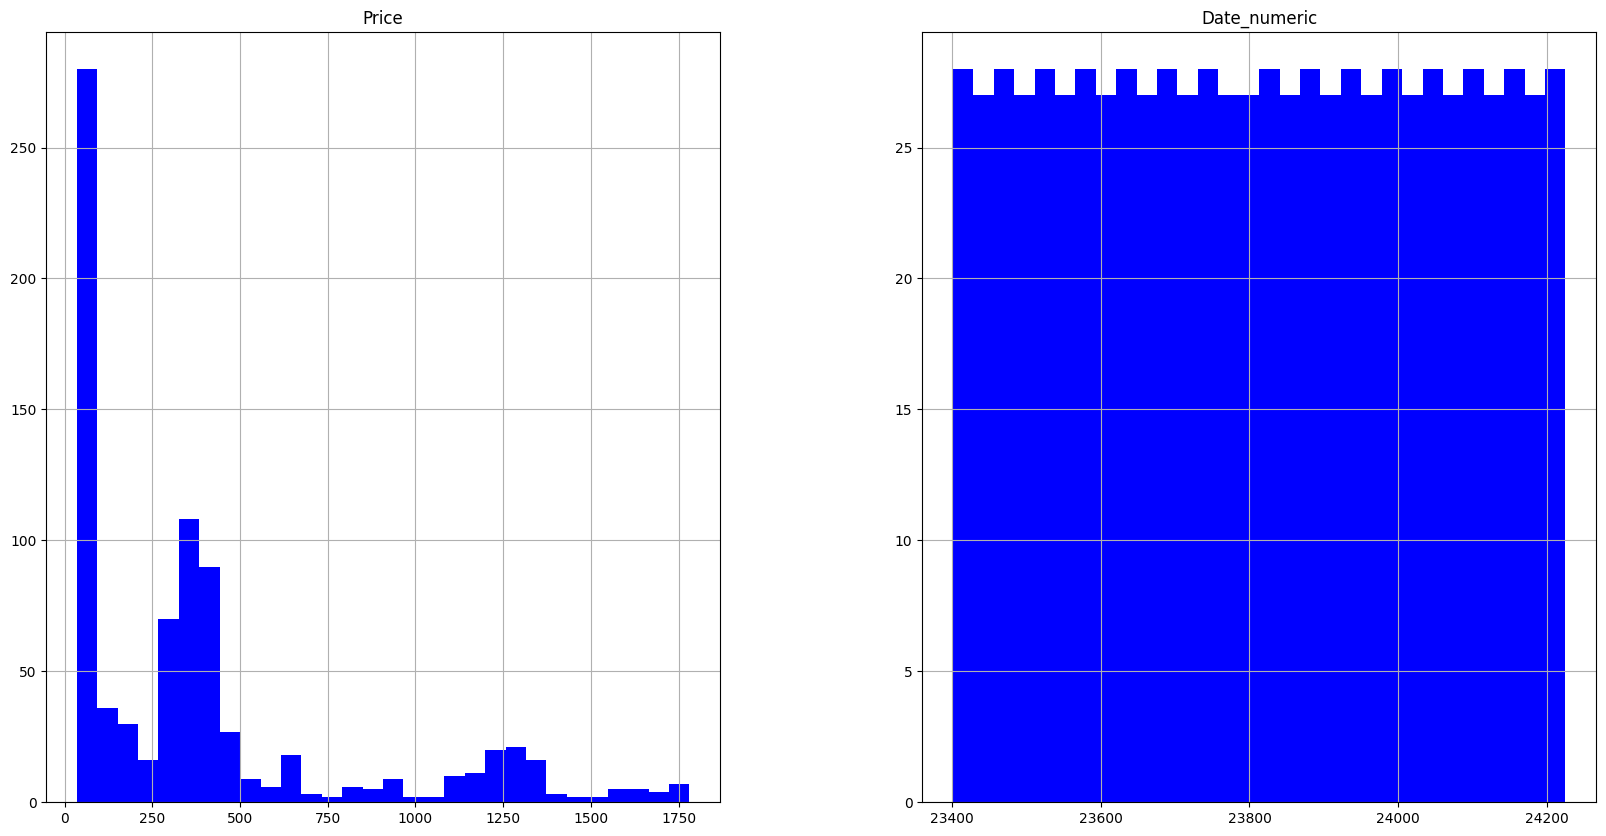

In [13]:
dataset.hist(bins=30, figsize = (20,10), color = 'blue')

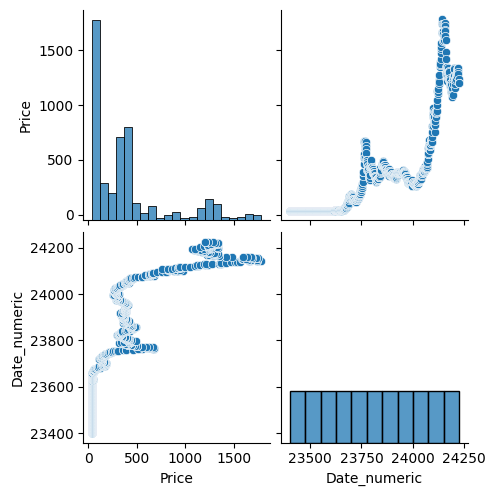

In [14]:
sns.pairplot(dataset)

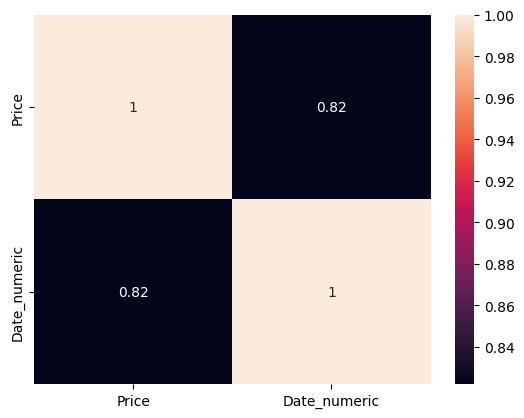

In [15]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

<Axes: xlabel='Date_numeric', ylabel='Price'>

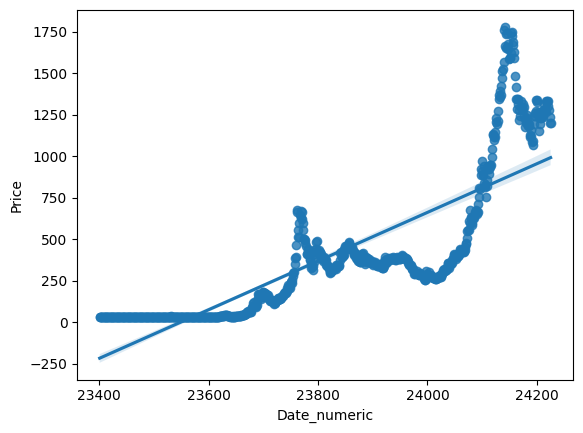

In [17]:
sns.regplot(x='Date_numeric', y = 'Price', data = dataset)

In [18]:
x = dataset[['Date_numeric']]
y = dataset['Price']

In [19]:
x.shape


(825, 1)

In [20]:
y.shape

(825,)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 72)

In [22]:
x_train.shape

(618, 1)

In [23]:
x_test.shape

(207, 1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)


LinearRegression()

In [25]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse

np.float64(53940.00952980847)

In [26]:
print('Linear Model Coefficient (m): ', lr.coef_)
print('Linear Model Coefficient (b): ', lr.intercept_)

Linear Model Coefficient (m):  [1.48461173]
Linear Model Coefficient (b):  -34952.78075214837


In [27]:
y_pred

array([ 2.77055504e+02,  7.50646644e+02,  4.99747263e+02,  3.50637924e+01,
        7.96669608e+02,  2.47363269e+02,  4.46301241e+02,  6.02185472e+02,
        4.38878182e+02,  8.10867559e+01,  3.61678372e+02,  9.28800051e+02,
        8.39723348e+02,  9.59976898e+02, -1.68976180e+01,  6.60085329e+02,
        9.79276850e+02,  7.22439022e+02,  2.40233447e+00,  6.15546977e+02,
        1.44925060e+02,  2.41424822e+02,  4.10670559e+02, -3.47129587e+01,
       -6.73744166e+01,  8.70900194e+02,  1.18202049e+02,  4.50755076e+02,
        7.59554315e+02,  7.74400432e+02,  7.66977373e+02,  6.85616965e+00,
        7.25408245e+02,  2.13217200e+02,  9.43646169e+02,  7.16500575e+02,
        5.66554790e+02, -1.54130062e+01,  9.85215297e+02, -1.51997285e+02,
        2.32517152e+02,  8.57538689e+02,  7.65492762e+02,  2.38455599e+02,
        9.62946121e+02, -5.66888981e-01,  4.28485900e+02, -1.34181944e+02,
        4.98262651e+02,  5.51708673e+02,  5.57647120e+02,  1.99855694e+02,
        2.23609482e+02,  

Text(0.5, 1.0, 'Gold Price per date')

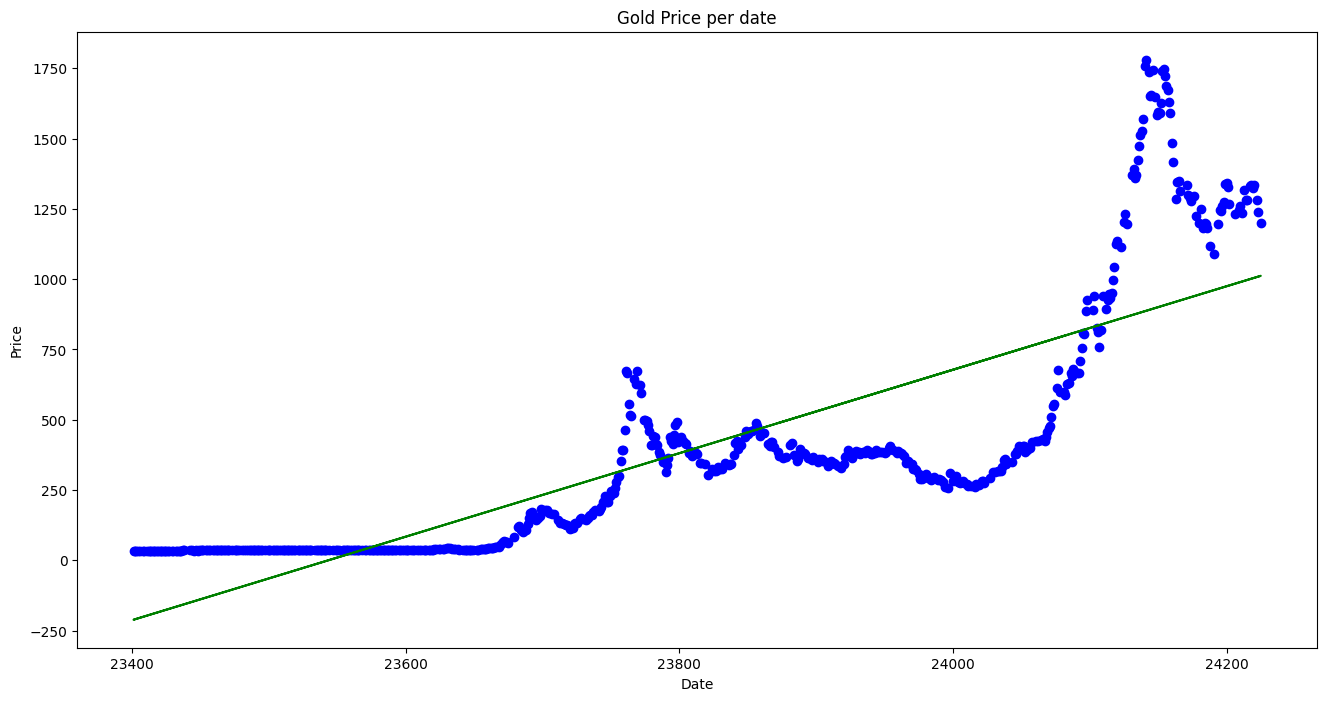

In [28]:
plt.figure(figsize=(16,8))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Gold Price per date')

In [29]:
new_value = [[5.0]]
# Define new_value as a DataFrame with the correct column name
new_value_df = pd.DataFrame(new_value, columns=['Date_numeric'])

# Make prediction
new_prediction = lr.predict(new_value_df)
new_prediction

d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-34945.35769352])

In [58]:
import joblib

model_file = open("lregress_goldprice.pkl","wb")
joblib.dump(lr,model_file)
model_file.close()